In [1]:
! pip install segmentation_models
! pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 32.1 MB/s eta 0:00:0000:0100:01


In [2]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import model_utility

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Segmentation Models: using `tf.keras` framework.


# What are we doing today?

In [8]:
model_path = "models/both_big_aug/"
type = "both_shift"
training_size = "1200"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

# Create training data

In [7]:
# X, Y = [], []

X, Y = model_utility.data_gather(X, Y, "dark_spokes_training_images", "dark_spokes_training_masks", aug_flag = 1, aug_num = 5)

Compose([
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit_x=(-0.0625, 0.0625), shift_limit_y=(0, 0), scale_limit=(0.0, 0.0), rotate_limit=(0, 0), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box'),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)
1200 1200


In [9]:
X = normalize(np.array(X), axis=1)
Y = (np.array(Y))/255.

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1020, 160, 736)
(180, 160, 736)
(1020, 160, 736)
(180, 160, 736)


In [10]:
model = model_utility.define_model(SIZE_Y, SIZE_X, backbone)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 160, 736, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 160, 736, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 166, 742, 1)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 80, 368, 64)  3136        ['zero_padding2d[0][0]']   

In [11]:
history = model_utility.fit_model(x_train, y_train, model, model_path, batch_size = 10, epochs = int(epoch_num), validation_split = .13)

results = model.evaluate(x_test, y_test)

model_utility.save_model_history(model_path, model, history, results)

Epoch 1/300
89/89 [==============================] - ETA: 0s - loss: 0.1242 - iou_score: 0.0994
Epoch 1: val_iou_score improved from -inf to 0.02096, saving model to models/both_big_aug/both_shift_spoke_1200im_300e_resnet34.h5
89/89 [==============================] - 34s 190ms/step - loss: 0.1242 - iou_score: 0.0994 - val_loss: 0.1962 - val_iou_score: 0.0210
Epoch 2/300
89/89 [==============================] - ETA: 0s - loss: 0.0516 - iou_score: 0.2282
Epoch 2: val_iou_score improved from 0.02096 to 0.03510, saving model to models/both_big_aug/both_shift_spoke_1200im_300e_resnet34.h5
89/89 [==============================] - 14s 152ms/step - loss: 0.0516 - iou_score: 0.2282 - val_loss: 0.2491 - val_iou_score: 0.0351
Epoch 3/300
89/89 [==============================] - ETA: 0s - loss: 0.0429 - iou_score: 0.2831
Epoch 3: val_iou_score improved from 0.03510 to 0.03989, saving model to models/both_big_aug/both_shift_spoke_1200im_300e_resnet34.h5
89/89 [==============================] - 13s 

# Plots

Which model is this? - both_shift_spoke_1200im_300e_resnet34.json


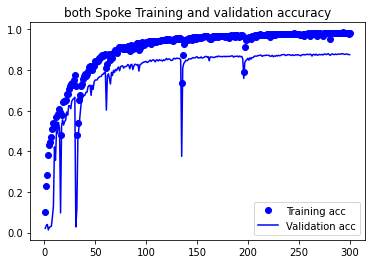

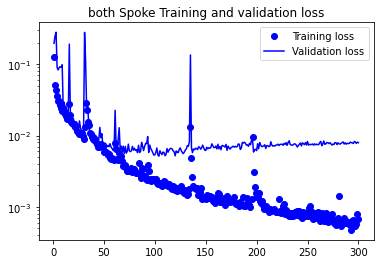

Last Train IOU Score:  0.9820398092269897
Last Train Loss Score:  0.0006741999532096088
Last Validation IOU Score:  0.8760672807693481
Last Validation Loss Score:  0.007943793199956417
both_shift
1200
300


In [12]:
model_utility.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

In [3]:
model_path = "models/checkpoint/"
type = "darkGB_Callback_shuffled"
training_size = "360"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [13]:
from tensorflow import keras

model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

both_shift
1200
300


# testing with images outside of train/test(light)

The spklfmovprocessed/ training set is made of 17 images
W1593676089.png 0


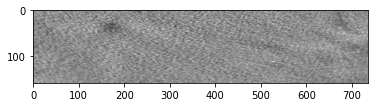

1/1 [==============================] - 1s 1s/step


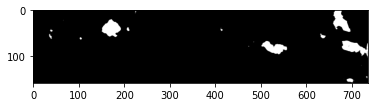

W1593678128.png 1


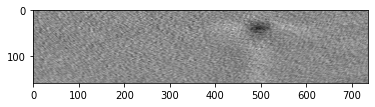

1/1 [==============================] - 0s 25ms/step


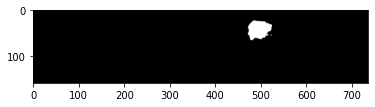

W1593680167.png 2


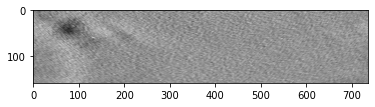

1/1 [==============================] - 0s 21ms/step


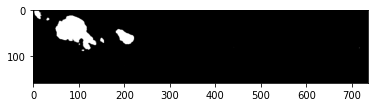

W1593682206.png 3


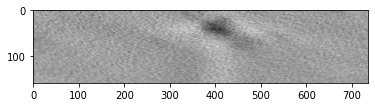

1/1 [==============================] - 0s 20ms/step


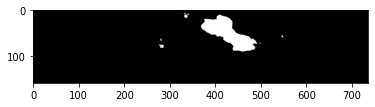

W1593684245.png 4


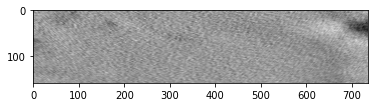

1/1 [==============================] - 0s 19ms/step


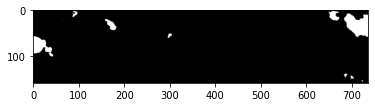

W1593686284.png 5


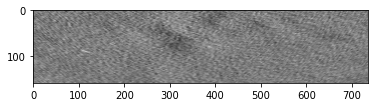

1/1 [==============================] - 0s 29ms/step


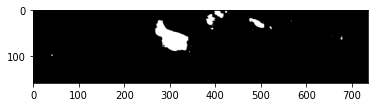

W1593688323.png 6


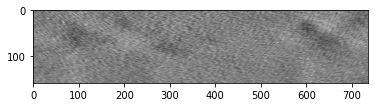

1/1 [==============================] - 0s 22ms/step


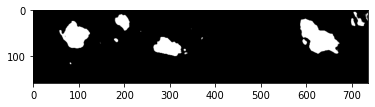

W1593690362.png 7


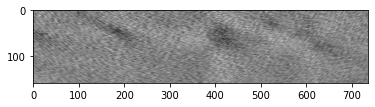

1/1 [==============================] - 0s 22ms/step


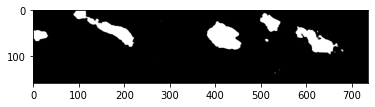

W1593692401.png 8


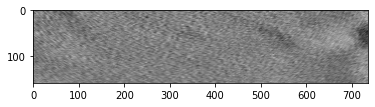

1/1 [==============================] - 0s 22ms/step


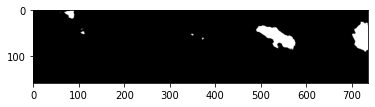

W1593694440.png 9


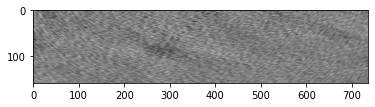

1/1 [==============================] - 0s 22ms/step


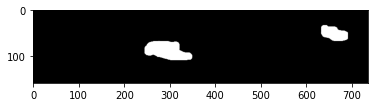

W1593696479.png 10


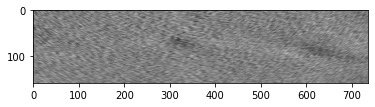

1/1 [==============================] - 0s 26ms/step


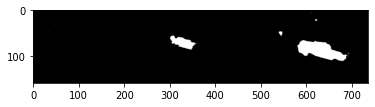

W1593698518.png 11


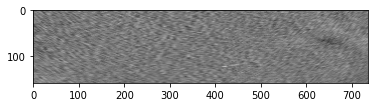

1/1 [==============================] - 0s 21ms/step


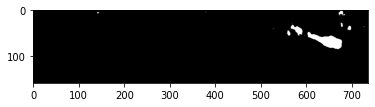

W1593700557.png 12


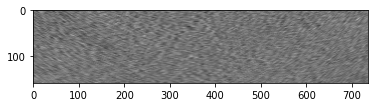

1/1 [==============================] - 0s 22ms/step


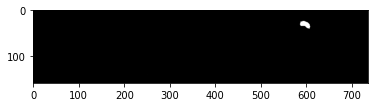

W1593702596.png 13


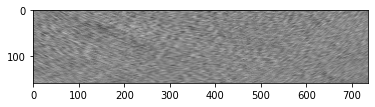

1/1 [==============================] - 0s 23ms/step


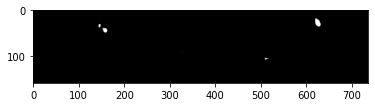

W1593704635.png 14


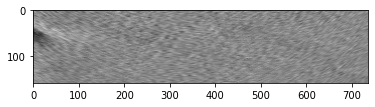

1/1 [==============================] - 0s 21ms/step


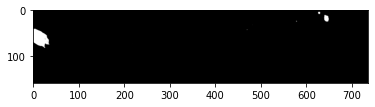

W1593706674.png 15


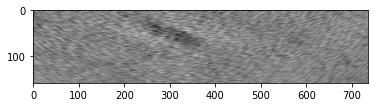

1/1 [==============================] - 0s 21ms/step


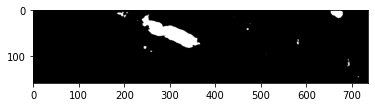

W1593708713.png 16


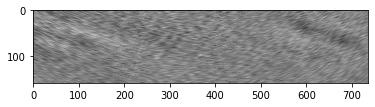

1/1 [==============================] - 0s 21ms/step


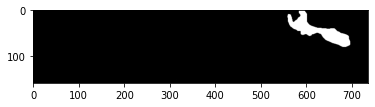

In [14]:
model_utility.model_testing(model, "spklfmovprocessed", 17)